In [37]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [38]:
from urllib.request import urlretrieve
urlretrieve(URL, 'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x2ad4ec68e90>)

In [39]:
import pandas as pd
data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates = True)
data.head()
end_time = pd.to_datetime('2017-01-01')
filtered_data = data[data.index <= end_time]

C:\Users\marce\AppData\Local\Temp\ipykernel_8232\3436303513.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates = True)


,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk"
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


<Axes: xlabel='Date'>

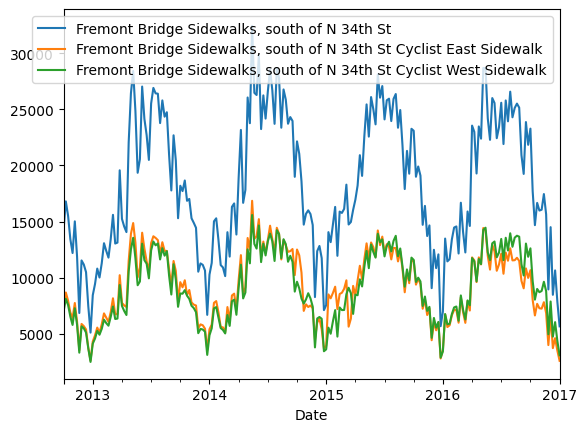

In [40]:
#data.plot()
filtered_data.resample('W').sum().plot()

<Axes: xlabel='Date'>

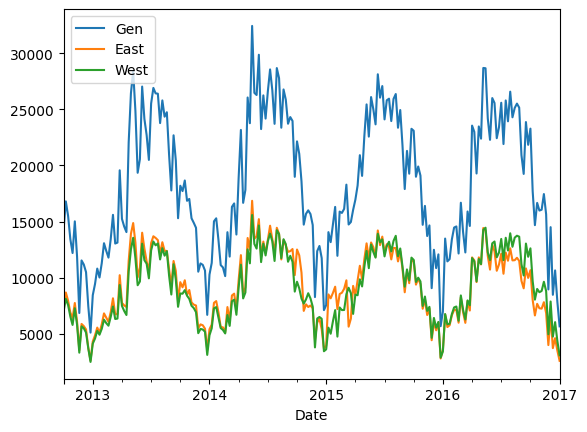

In [41]:
import matplotlib.pyplot as plt

filtered_data.columns = ['Gen', 'East', 'West']

filtered_data.resample('W').sum().plot()

(0.0, 1058559.2)

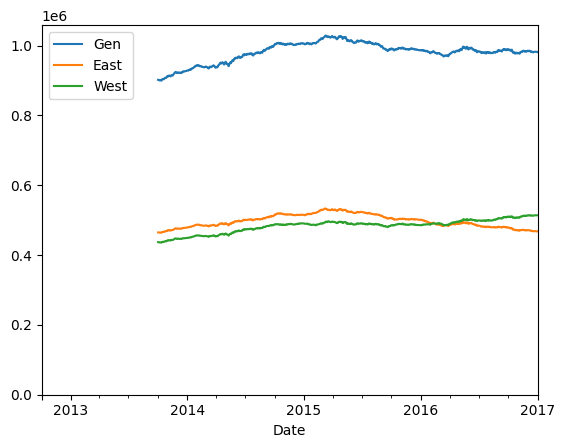

In [42]:
ax = filtered_data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0,None)

<Axes: xlabel='time'>

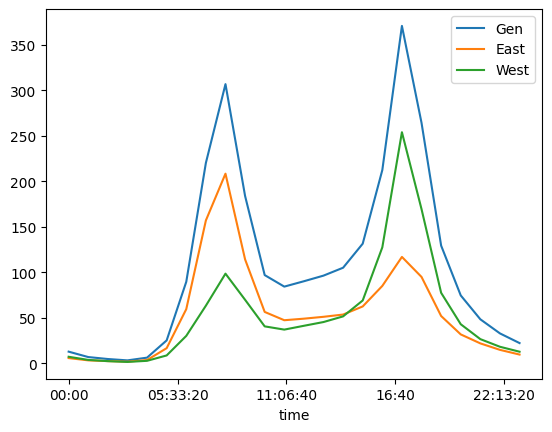

In [43]:
filtered_data.groupby(filtered_data.index.time).mean().plot()

In [45]:
pivoted = filtered_data.pivot_table('Gen', index=filtered_data.index.time, columns=filtered_data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


<Axes: xlabel='time'>

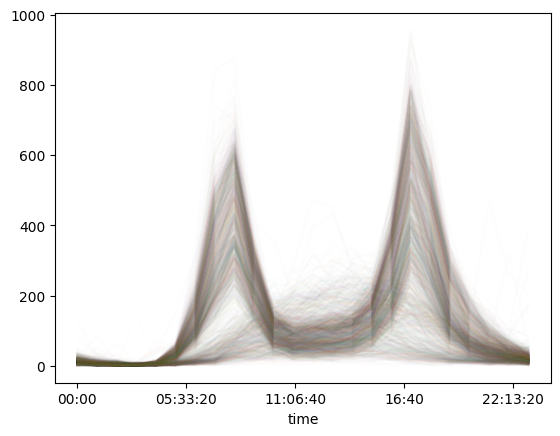

In [46]:
pivoted.plot(legend=False, alpha=0.01)
#alpha = transparency

Seem to have 2 modes : commute days vs week-end / vacancy

In [47]:
X = pivoted.fillna(0).T.values
X.shape

(1552, 24)

In [48]:
from sklearn.decomposition import PCA
X2 = PCA(2).fit_transform(X)
#remove points from last years as there are no more cluster...

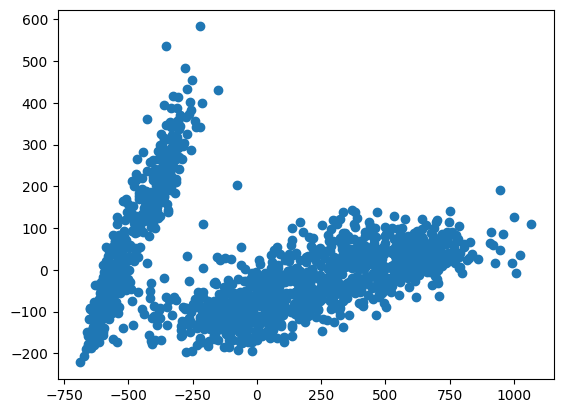

In [49]:
plt.scatter(X2[:,0], X2[:,1])

In [50]:
from sklearn.mixture import GaussianMixture
gnn = GaussianMixture(2)
gnn.fit(X)
labels = gnn.predict(X)
labels

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

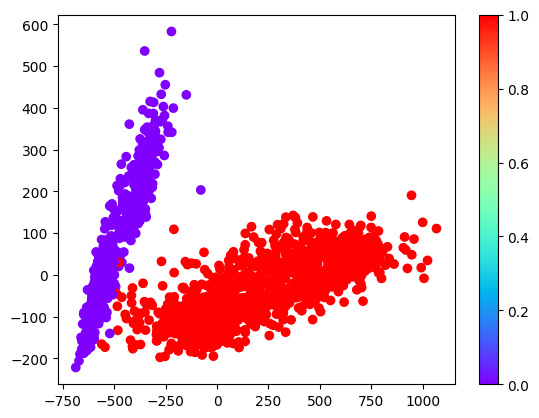

In [51]:
plt.scatter(X2[:,0], X2[:,1], c=labels, cmap='rainbow')
plt.colorbar()

Text(0.5, 1.0, 'Red cluster')

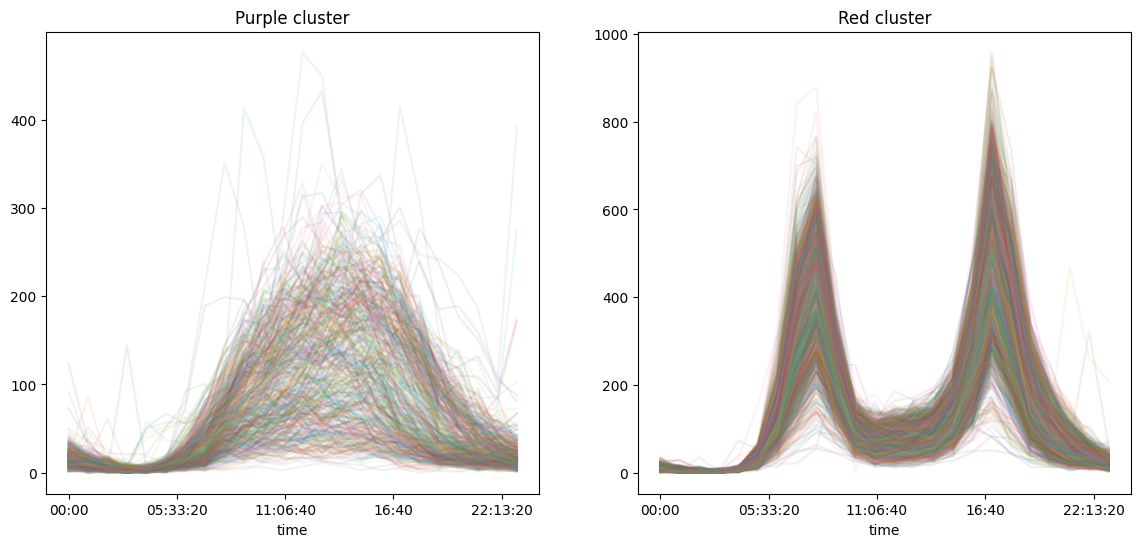

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))

pivoted.T[labels == 0].T.plot(legend=False, alpha=0.1, ax=ax[0])
pivoted.T[labels == 1].T.plot(legend=False, alpha=0.1, ax=ax[1])

ax[0].set_title('Purple cluster')
ax[1].set_title('Red cluster')

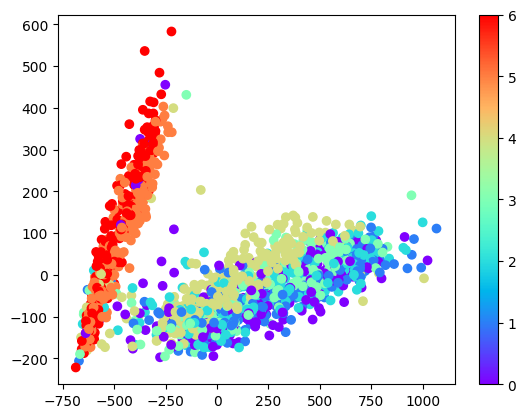

In [55]:
dayofweek = pd.DatetimeIndex(pivoted.columns).day_of_week
plt.scatter(X2[:,0], X2[:,1], c=dayofweek, cmap='rainbow')
plt.colorbar()

In [56]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (dayofweek < 5)]

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-08',
               '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12',
               '2012-10-15', '2012-10-16',
               ...
               '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-23', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', length=1069, freq=None)